<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/da06_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA(Exploratory Data Analysis)

탐색적 데이터 분석: 그래프나 통계적인 방법으로 자료를 분석하는 과정.

# 필요한 모듈 import

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ex 1. iris 데이터셋

*   seaborn 패키지의  iris 데이터셋을 로드
*   iris 데이터 탐색 - 데이터프레임 일부 출력, 요약 정보, 기술 통계량, 카테고리 타입 변수 빈도수
*   숫자 타입 변수(컬럼)들의 box plot
*   숫자 타입 변수(컬럼)들의 평균 막대 그래프
*   품종별 모든 연속형 변수들의 box plot
*   품종별 모든 연속형 변수들의 평균 막대 그래프
*   petal_width ~ petal_length 산점도. 품종별로 색깔을 다르게 시각화
*   모든 연속형 변수들 간의 상관관계(산점도). Hint: `pairplot()`


In [5]:
iris = sns.load_dataset('iris') # 데이터셋 로드

iris.head() # 일부 출력

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.info() # 요약 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.describe() # 기술 통계량

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris.species.value_counts() # 카테고리 타입 변수 빈도수

,count
species,
setosa,50
versicolor,50
virginica,50


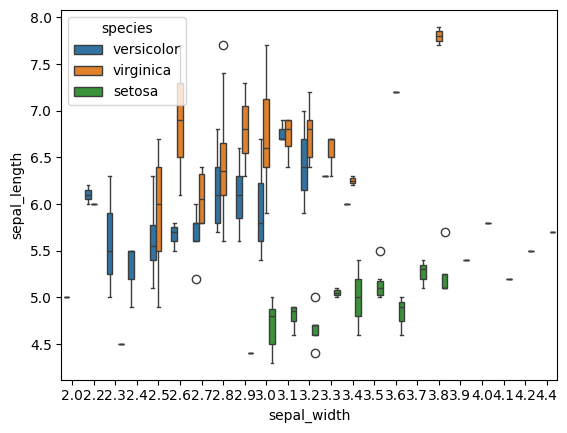

In [15]:
# 숫자 타입 변수(컬럼)들의 box plot
sns.boxplot(data=iris, x='sepal_width', y='sepal_length', hue='species')
plt.show()

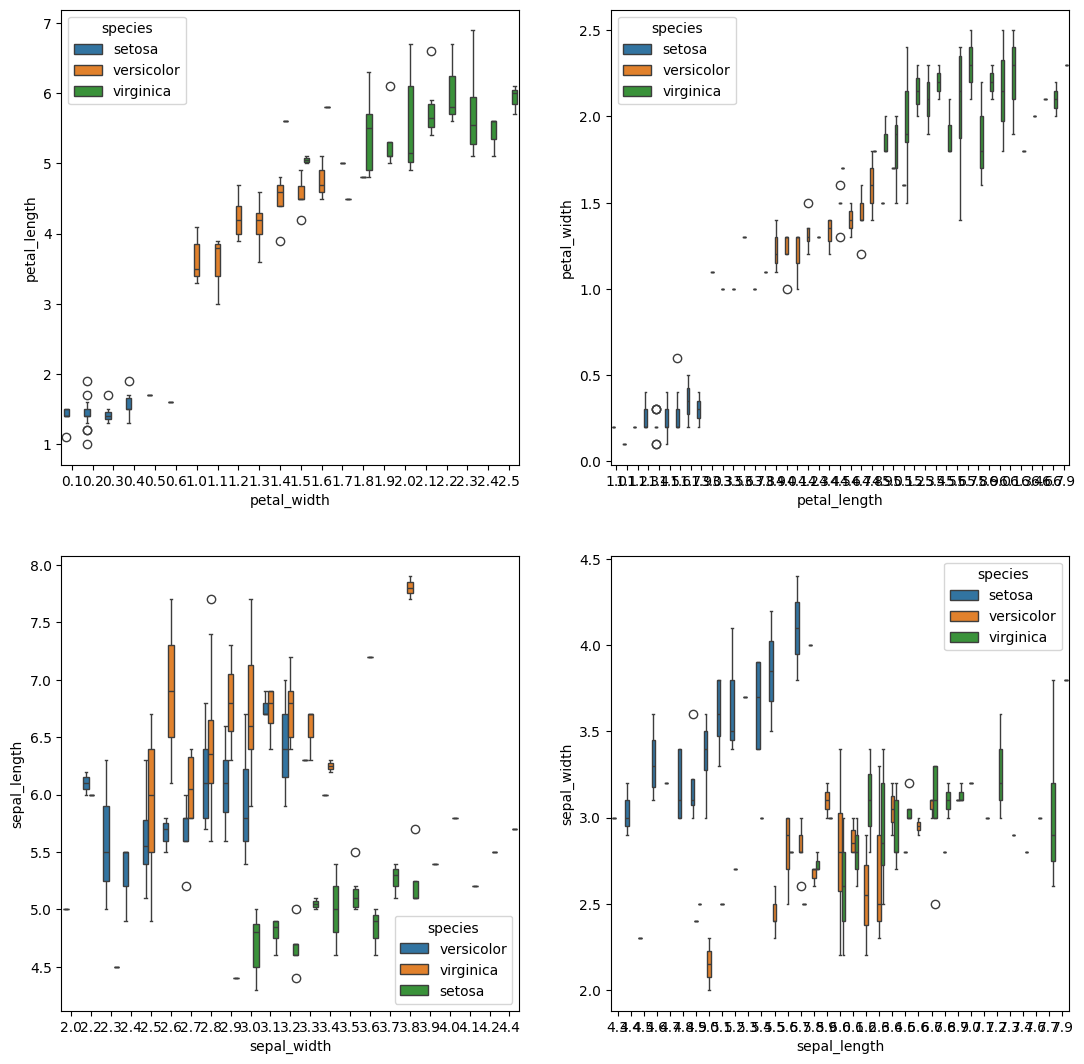

In [56]:
# 숫자 타입 변수(컬럼)들의 box plot

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(13,13))

sns.boxplot(data=iris, x='petal_width', y='petal_length', ax=ax[0,0], hue='species')
sns.boxplot(data=iris, x='petal_length', y='petal_width', ax=ax[0,1], hue='species')
sns.boxplot(data=iris, x='sepal_width', y='sepal_length', ax=ax[1,0], hue='species')
sns.boxplot(data=iris, x='sepal_length', y='sepal_width', ax=ax[1,1], hue='species')

plt.show()

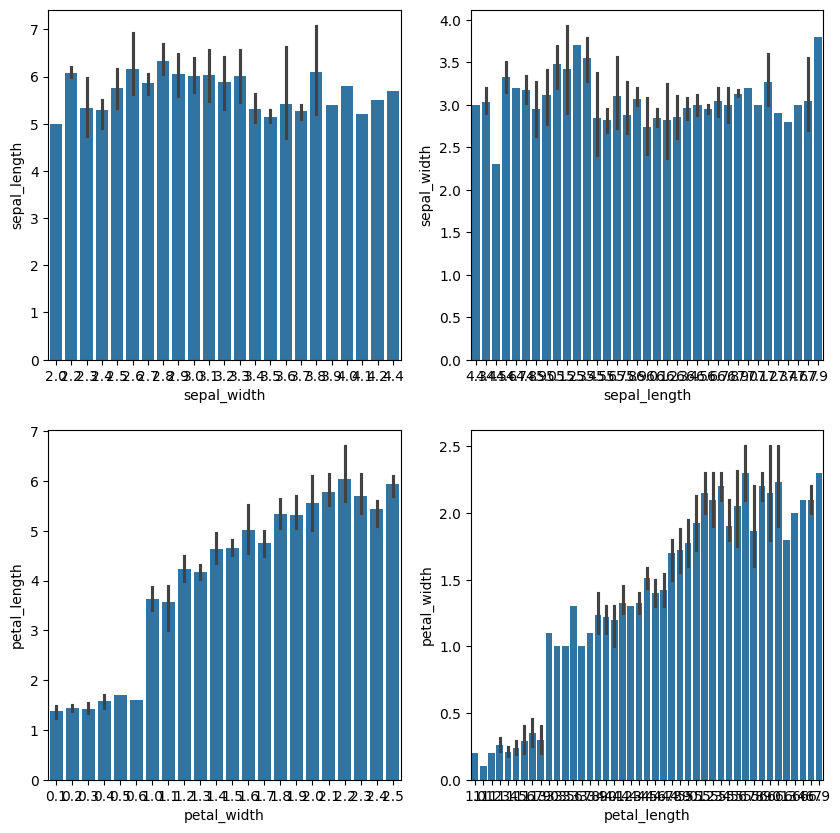

In [62]:
# 숫자 타입 변수(컬럼)들의 평균 막대 그래프
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

sns.barplot(data=iris, x='sepal_width', y='sepal_length', ax=ax[0,0])
sns.barplot(data=iris, x='sepal_length', y='sepal_width', ax=ax[0,1])
sns.barplot(data=iris, x='petal_width', y='petal_length', ax=ax[1,0])
sns.barplot(data=iris, x='petal_length', y='petal_width', ax=ax[1,1])

plt.show()

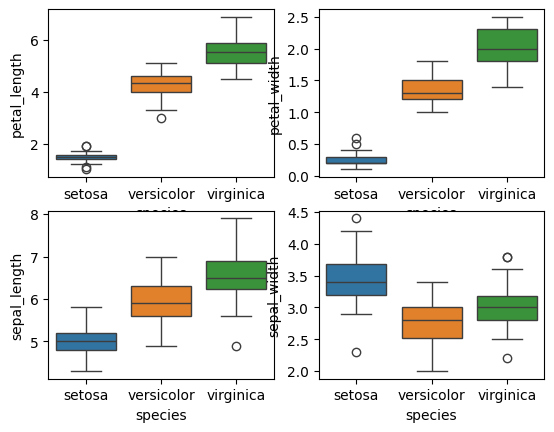

In [53]:
# 품종별 모든 연속형 변수들의 box plot
fig, ax = plt.subplots(ncols=2, nrows=2)

sns.boxplot(data=iris, x='species', y='petal_length', ax=ax[0,0], hue='species')
sns.boxplot(data=iris, x='species', y='petal_width', ax=ax[0,1], hue='species')
sns.boxplot(data=iris, x='species', y='sepal_length', ax=ax[1,0], hue='species')
sns.boxplot(data=iris, x='species', y='sepal_width', ax=ax[1,1], hue='species')

plt.show()

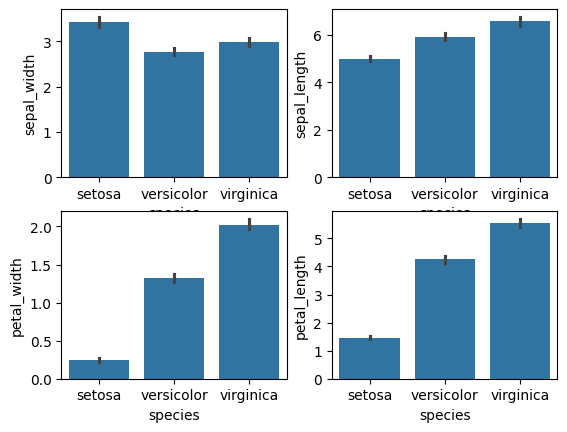

In [68]:
# 품종별 모든 연속형 변수들의 평균 막대 그래프
fig, ax = plt.subplots(nrows=2, ncols=2)

sns.barplot(data=iris, x='species', y='sepal_width', ax=ax[0,0])
sns.barplot(data=iris, x='species', y='sepal_length', ax=ax[0,1])
sns.barplot(data=iris, x='species', y='petal_width', ax=ax[1,0])
sns.barplot(data=iris, x='species', y='petal_length', ax=ax[1,1])

plt.show()

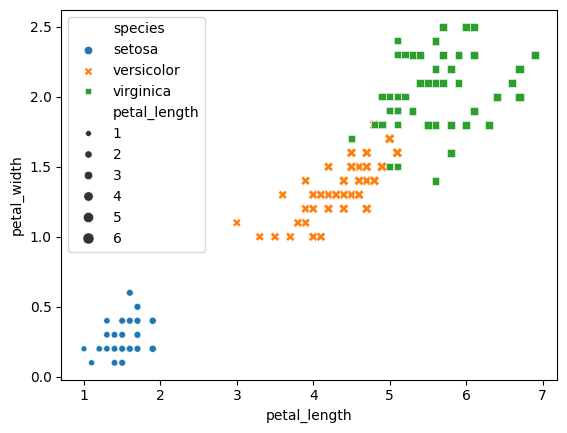

In [72]:
# petal_width ~ petal_length 산점도, 품종별로 색깔을 다르게 시각화.
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', style='species', size='petal_length')

plt.show()

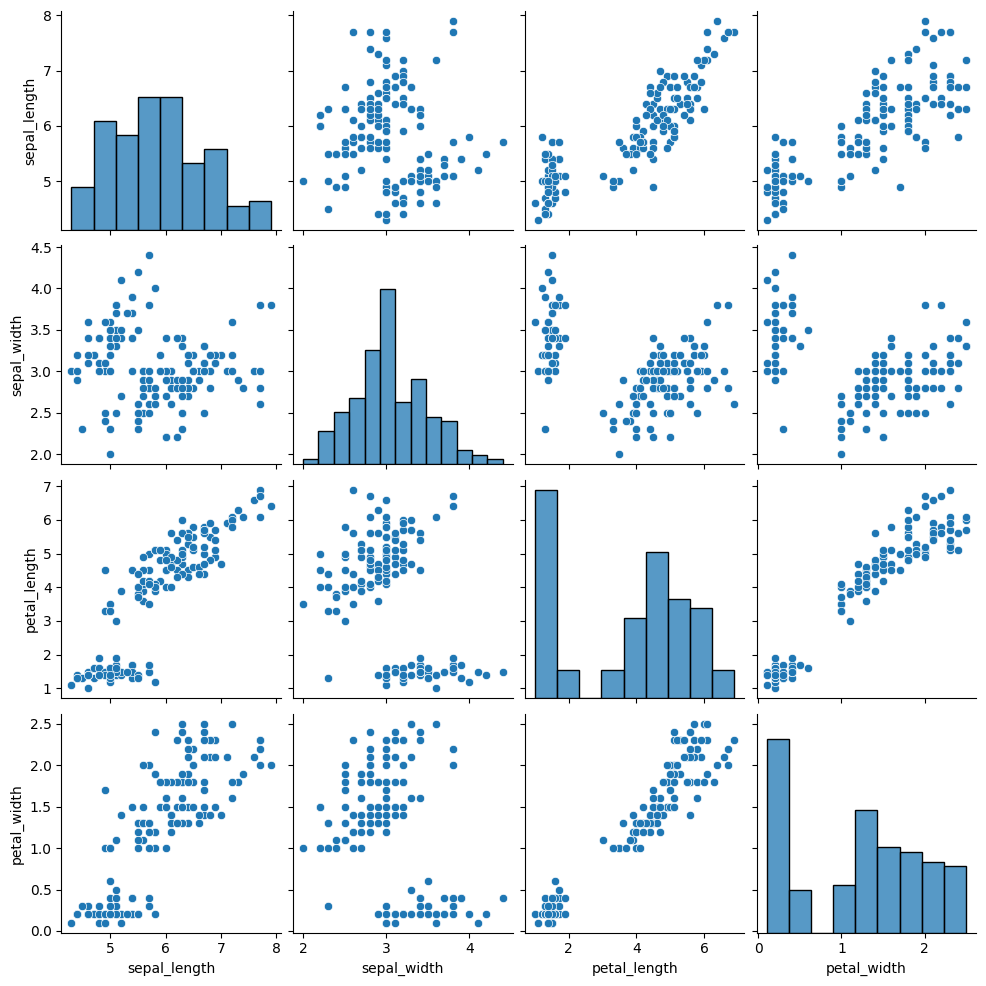

In [74]:
# 모든 연속형 변수들 간의 상관관계(산점도). Hint : pairplot()
sns.pairplot(data=iris)

plt.show()

# Ex 2. mpg 데이터셋

*   seaborn 패키지의 예제 데이터 셋 'mpg'를 로드해서 DataFrame 생성
*   DataFrame 탐색 - 출력, 요약 정보, 숫자 타입 기술 통계량, 카테고리 타입 빈도수
*   산점도
    *   mpg(연비) ~ displacement(배기량)
    *   2x2 모양의 subplot을 생성
        *   mpg ~ cylinders(실린더 개수)
        *   mpg ~ horsepower(마력)
        *   mpg ~ weight(무게)
        *   mpg ~ acceleration(가속도)
*   빈도수 막대 그래프
    *   cyliners 빈도수
    *   origin(자동차 생산 지역) 빈도수
    *   model_year(자동차 생산 연도) 빈도수
        *   선 그래프 가능?
    *   origin 별, cylinders 별 빈도수
*   통계량 막대 그래프 - 2개의 subplot 생성
    *   cylinders 별 mpg의 중앙값(median)
    *   origin 별 mpg의 중앙값

*   Box plot
    *   3개의 subplot을 생성
        *   mpg, displacement, weight box plot
    *   origin 별 mpg box plot
*   Histogram
    *   4개의 subplot을 생성
        *   mpg, displacement, weight, model_year histogram
*   Pair plot